In [0]:
                                                          # Header
  
# This is vanilla flavour network architecture.

# Using only 3x3 kernal for convolution.
# Number of kernals in layers of a convolution block is increased in arthematic progression till 128 is reached(16,32,64,128)

# After the end of each convolution block, there is a transistion block 
# Transistion block has
#  1. 1x1 convolution which reduces the number of kernals(selection) and 
#  2. Max pooling

# Max pooling is avoid towards the end (before Flattening and Softmax)



# https://keras.io/

#Statement start with "!" is a command in Colab.
#The following command will quitly install keras python module from python packaging index
#After installing keras, it is being imported

!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
#numpy is imported with "np" as kind of alias. 
#From here on we can use np instead of numpy.

import numpy as np

#The following would import relevant models and layer. 
#Also, we have imported the mnist data set.

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
# Load MNIST data set into training data and test set data
# There are 70,000 images with their labels in MNIST dataset.
# Randomly, 60k will be loaded into X_train and their corresponding labels y_train.
# Remaining 10k images will be loaded into X_test and their labels y_test.

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


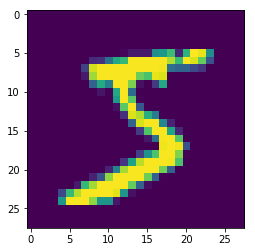

In [0]:
#Printing the shape of Training data set
#From this print statement, there are 60,000 images in X train of size 28X28.
#Correspoindingly, y_train is a column matrics of size 60000

print (X_train.shape)


# Using plt.imshow method from matplot library, the first image is printed. y[0] will be have a value of 5.
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
#Convert the images in training dataset and test set into multidimentional arrays of their pixel intensity values.

X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
#Convert the pixel intensity values into floating point value and normalize the pixel intensities by dividing with 255. Max value of pixel intensity is 255.

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices

y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices

# This will convert the numbers in the Y_train and y_test into column metrics of size 10. Element corresponding to the number will have value 1 and all other elements will be 0.
# For example, 5 will be represented by the column matrics [0,0,0,0,1,0,0,0,0,0]


Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
#Print first 10 elements in the Y_train after converting into catogorical matrices.

Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:


from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(Convolution2D(16, 1, activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Convolution2D(16, 4, 4, activation='relu'))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(Convolution2D(10, 1, activation='relu'))

model.add(Convolution2D(10, 3, 3))

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (4, 4), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_laun

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 20, 20, 128)       73856     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 20, 20, 16)        2064      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 7, 7, 16)          4112      
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
# 60k images training images will be trained in batches of 32 images at a time. 
# One epoch consists of (60k/32 = 1875) forward propagations followed by one backward propagation
# Network will be trained for 10 epoches and after the training, model will have the weights.


model.fit(X_train, Y_train, batch_size=32, nb_epoch=40, verbose=1,validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 20s 327us/step - loss: 0.2042 - acc: 0.9370 - val_loss: 0.0767 - val_acc: 0.9754
Epoch 2/40
60000/60000 [==============================] - 14s 241us/step - loss: 0.0713 - acc: 0.9780 - val_loss: 0.0652 - val_acc: 0.9788
Epoch 3/40
60000/60000 [==============================] - 15s 250us/step - loss: 0.0553 - acc: 0.9833 - val_loss: 0.0479 - val_acc: 0.9861
Epoch 4/40
60000/60000 [==============================] - 15s 244us/step - loss: 0.0451 - acc: 0.9861 - val_loss: 0.0313 - val_acc: 0.9898
Epoch 5/40
60000/60000 [==============================] - 14s 239us/step - loss: 0.0375 - acc: 0.9885 - val_loss: 0.0369 - val_acc: 0.9898
Epoch 6/40
60000/60000 [==============================] - 14s 239us/step - loss: 0.0323 - acc: 0.9901 - val_loss: 0.0343 - val_acc: 0.9904
Epoch 7/40
60000/60000 [==============================] - 15s 247us/step - loss: 0.0289 - acc: 0.9912 - val_loss: 0.

In [0]:
# For each of 10k images in the testset, predict the labels and check how many of them are matching with Y_test. Based this arrive at a score.


score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
#Print the score

print(score)

[0.04383292893074103, 0.9912]
